In [1]:
from astropy.io import ascii
from astropy.coordinates import SkyCoord
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np
import healpy as hp
from ztf_fields import show_fields
from astropy.time import Time

In [2]:
pgir_fields = ascii.read('data/gattini_fields.csv')

In [3]:
ztf_fields = ascii.read('data/ZTF_Fields.txt')

In [4]:
def get_pgir_fields_from_ztf_field(ztf_field_id, seplimit=5*u.deg):
    ztf_fields = ascii.read('data/ZTF_Fields.txt')
    pgir_fields = ascii.read('data/gattini_fields.csv')
    ztf_field = ztf_fields[ztf_fields['ID'] == ztf_field_id]
    
    pgir_field_centers = SkyCoord(ra=pgir_fields['RA'], dec=pgir_fields['Dec'], unit=(u.deg,u.deg))
    ztf_field_center = SkyCoord(ra=ztf_field['RA'], dec=ztf_field['Dec'], unit=(u.deg,u.deg))
    id1, id2, d2d, d3d =  ztf_field_center.search_around_sky(pgir_field_centers, seplimit=seplimit)
    pgir_matched_fields = pgir_fields[id1]
    pgir_matched_fields_centers = pgir_field_centers[id1]
    return pgir_matched_fields, pgir_matched_fields_centers, ztf_field, ztf_field_center

In [5]:
ztf_field_id = 562
pgir_matched_fields, pgir_matched_fields_centers, ztf_field, ztf_field_center = get_pgir_fields_from_ztf_field(ztf_field_id, seplimit=5*u.deg)
pgir_matched_fields

ID,RA,Dec,Gal Long,Gal Lat,Ecl Long,Ecl Lat
int64,float64,float64,float64,float64,float64,float64
554,86.1937695806,22.8055555556,185.136824913,-3.35616166382,86.4932722658,-0.588996315006
555,91.411160885,22.8055555556,187.563614448,0.796588862905,91.3027500319,-0.628965636107
623,83.7576189292,17.9444444444,188.091058906,-7.85078037187,84.0378625053,-5.36744601768
624,88.8280414644,17.9444444444,190.587284101,-3.71529237746,88.8817455018,-5.4919935429


In [6]:
print("fields =",[x['ID'] for x in pgir_matched_fields])
print("ra =", [x['RA'] for x in pgir_matched_fields])
print("dec =", [x['Dec'] for x in pgir_matched_fields])

fields = [554, 555, 623, 624]
ra = [86.1937695806, 91.411160885, 83.7576189292, 88.8280414644]
dec = [22.8055555556, 22.8055555556, 17.9444444444, 17.9444444444]


In [7]:
ztf_field

ID,RA,Dec,Ebv,Gal_Long,Gal_Lat,Ecl_Long,Ecl_Lat,Entry
int64,float64,float64,float64,float64,float64,float64,float64,int64
562,88.37309,18.95,0.55,189.8442,-2.9775,88.4566,-4.4806,561


# Plotting to be figured out

In [8]:
pgir_fields_phi = pgir_matched_fields_centers.ra.radian
pgir_fields_theta = -(pgir_matched_fields_centers.dec.radian - np.pi/2)

/Users/viraj/anaconda3/lib/python3.8/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  newcm.set_over(newcm(1.0))
/Users/viraj/anaconda3/lib/python3.8/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  newcm.set_under(bgcolor)
/Users/viraj/anaconda3/lib/python3.8/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This

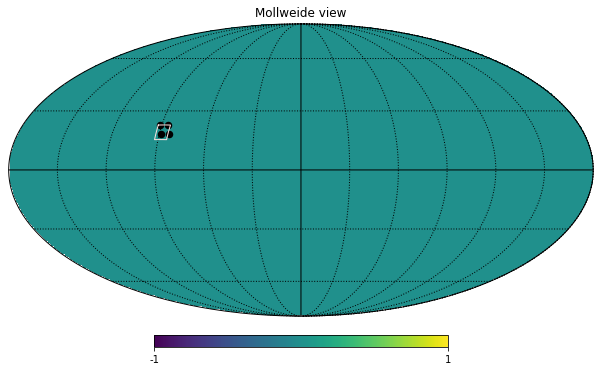

In [10]:
NSIDE = 32
NPIX = hp.nside2npix(NSIDE)
m = np.zeros(NPIX)
hp.mollview(m)
hp.graticule()

ax = plt.gca()
show_fields(
    ax, [ztf_field_id], 'equatorial', 'black', edgecolor='mistyrose', 
    lw=1, linestyle='-', fontsize=6, fontcolor='w', fontalpha=1, 
    alpha=1, zorder=2, hpy=True, show_text=False)

hp.projscatter(pgir_fields_theta, pgir_fields_phi, c='k',lw=1.5, alpha=1, zorder=1)

In [87]:
Time('2024-01-10T10:50:00').mjd, Time('2024-01-09T03:45:00').mjd

(60319.45138888889, 60318.15625)

In [14]:
Time('2024-07-01T00:00:00').mjd, Time('2024-07-01T12:50:00').mjd

(60492.0, 60492.53472222222)